# Analisis estadistico de "CÓDIGO ÚNICO DE MEDICAMENTOS VENCIDOS"

Este proyecto realiza un analisis exploratorio de datos del dataframe de codigo unico de medicamentos vendidos en Colombia, suministrado por el Instituto Nacional de Vigilancia de Medicamentos y Alimentos INVIMA, con el proposito de analizar variables, hallar patrones y cruzar variables.
https://www.datos.gov.co/Salud-y-Protecci-n-Social/C-DIGO-NICO-DE-MEDICAMENTOS-VENCIDOS/vwwf-4ftk/about_data

In [1]:
import creacion_y_lectura
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = creacion_y_lectura.df      # data frame reducido (data frame original = 152000 filas)

In [3]:
df.head()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad,IUM
0,9855,LORATADINA TABLETAS 10 MG,LABORATORIOS FARMACÉUTICOS A Z PHARMA SAS,INVIMA 2005 M-002539 R-1,08/11/1995,31/10/2015,Vencido,9855,4,50.0,...,A,LORATADINA,mg,1.000000e+06,TABLETA,TABLETA,COLOMPACK S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
1,19906439,VITAFULL MEN MK TABLETAS,TECNOQUIMICAS S.A.,INVIMA M-014822,11/09/2000,23/11/2010,Vencido,19906439,1,30.0,...,A,CLORHIDRATO DE PIRIDOXINA (3.920 MG) EQUIVALEN...,mg,3.000000e+05,TABLETA,TABLETA,GENERAL NUTRITION INTERNATIONAL INC,FABRICANTE,IMPORTAR Y VENDER,NaN
2,58050,EFECTIN 300 MG TABLETAS,LABORATORIOS BUSSIÉ S.A.,INVIMA M-14427,19/05/2000,11/01/2010,Vencido,58050,2,50.0,...,A,TIAMINA CLORHIDRATO,mg,3.000000e+07,TABLETA,TABLETA,LABORATORIOS BUSSIÉ S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
3,42677,DRISTAN CALIENTE,WYETH CONSUMER HEALTHCARE LTD.,RSM-EXP 20020013441,31/08/1992,05/09/2012,Vencido,42677,3,6.0,...,A,MALEATO DE CLORFENIRAMINA,g,4.000000e-03,100 G,POLVO PARA RECONSTITUIR A SOLUCION ORAL,LABORATORIO PHARMETIQUE S.A.,FABRICANTE,FABRICAR Y EXPORTAR,NaN
4,212568,VACUNA D.P.T. ADSORBIDA.,SANOFI PASTEUR LIMITED,INVIMA M-010647,24/04/1998,05/05/2008,Vencido,212568,4,20.0,...,S,TOXOIDE TETANICO SLF,IU,4.000000e+06,ML,SUSPENSION INYECTABLE,SANOFI PASTEUR LIMITED,FABRICANTE,IMPORTAR Y VENDER,NaN


El presente grupo de datos contiene informacion sobre medicamentos vencidos y su codigo unico proporcionados por parte del invima

Descripcion:  

expediente = Número del expediente asociado al registro sanitario

producto = Nombre del producto

titular = Nombre del titular del registro sanitario

registrosanitario = Número del registro sanitario o notificación sanitaria

fechaexpedicion = Fecha de expedición del registro sanitario

fechavencimiento = Fecha de vencimiento del registro sanitario

estadoregistro = Estado del registro sanitario

expedientecum = Número del expediente del Código Único de Medicamentos

consecutivocum = Número del consecutivo del Código único de Medicamentos

cantidadcum = Cantidad de medicamento por la presentación que se registra

descripcioncomercial = Descripción del CUM

estadocum = Estado actual del CUM

fechaactivo = Fecha de activación del código CUM

fechainactivo = Fecha en al que queda inactivo el código CUM

muestramedica = Indica si la presentación comercial es es una muestra medica

unidad = Unidad de medida del medicamento

atc = Código ATC

descripcionatc = Descripción de ATC

viaadministracion = Vía de administración del medicamento

concentracion = Cantidad de principio activo expresada por peso o por volumen, de acuerdo con la naturaleza de la forma farmacéutica.

principioactivo = Descripción del principio activo

unidadmedida = Unidad de medida del principio activo

cantidad = Cantidad del principio activo

unidadreferencia = Unidad de forma farmacéutica

formafarmaceutica = Indica la forma de presentar los medicamentos

nombrerol = Nombre del rol asociado al registro sanitario

tiporol = Tipo de rol asociado al registro sanitario (fabricante, apoderado, envasador, etc.…)

modalidad = Forma como se realizara , importara o comercializará el producto

IUM = Identificador Único de Medicamento

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expediente            500 non-null    int64  
 1   producto              500 non-null    object 
 2   titular               500 non-null    object 
 3   registrosanitario     500 non-null    object 
 4   fechaexpedicion       500 non-null    object 
 5   fechavencimiento      500 non-null    object 
 6   estadoregistro        500 non-null    object 
 7   expedientecum         500 non-null    int64  
 8   consecutivocum        500 non-null    int64  
 9   cantidadcum           500 non-null    float64
 10  descripcioncomercial  500 non-null    object 
 11  estadocum             500 non-null    object 
 12  fechaactivo           500 non-null    object 
 13  fechainactivo         498 non-null    object 
 14  muestramedica         500 non-null    object 
 15  unidad                5

In [4]:
df.shape

(500, 29)

Data set de 29 columnas, 3 flotantes, 3 enteros, y 23 categoricos

In [5]:
df.isnull().sum()

expediente                0
producto                  0
titular                   0
registrosanitario         0
fechaexpedicion           0
fechavencimiento          0
estadoregistro            0
expedientecum             0
consecutivocum            0
cantidadcum               0
descripcioncomercial      0
estadocum                 0
fechaactivo               0
fechainactivo             2
muestramedica             0
unidad                    0
atc                       0
descripcionatc            0
viaadministracion         0
concentracion             0
principioactivo           0
unidadmedida              0
cantidad                  0
unidadreferencia          5
formafarmaceutica         0
nombrerol                 0
tiporol                   0
modalidad                 0
IUM                     500
dtype: int64

La variable "fechainactivo" tiene algunos valores nulos, "unidadreferencia" tambien tiene valores nulos y la variable "IUM" todos sus valores son nulos

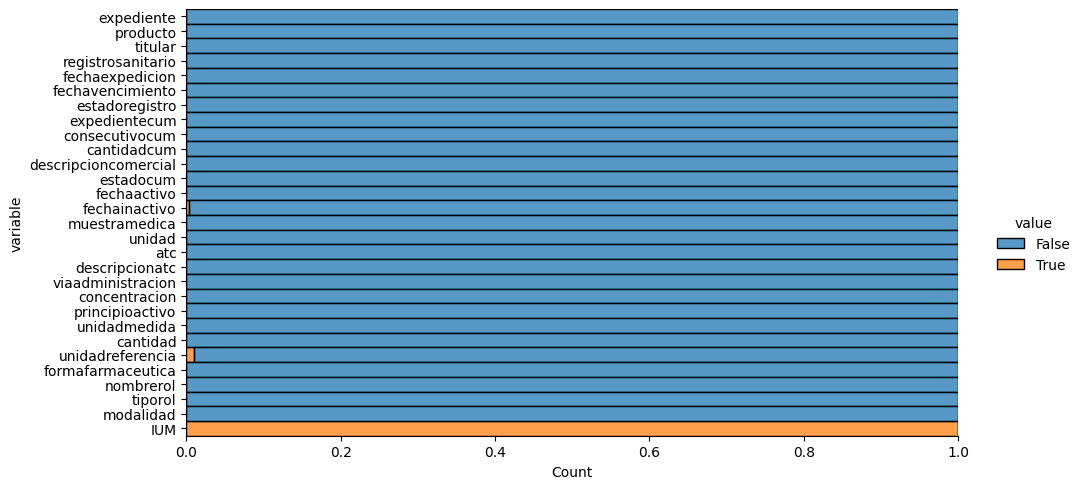

In [6]:
df.isnull().melt().pipe(lambda df : (sns.displot(data=df, y="variable", hue="value", multiple="fill", aspect=2)));

Visualizacion de la relevacia y presencia de los datos nulos en cada variable

In [7]:
# Procedemos con la eliminacion de la columna IUM ya que no aporta nada de informacion al dataset

df_2= df.drop("IUM", axis=1)
df_2.head()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,viaadministracion,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad
0,44835,STIEVAMYCIN GEL,GLAXOSMITHKLINE COLOMBIA S.A.,INVIMA 2008M-010802-R1,05/08/1998,17/06/2018,Vencido,44835,2,30.0,...,TOPICA (EXTERNA),D,TRETINOINA,g,0.025,100G,GEL TOPICO,GLAXOSMITHKLINE COLOMBIA S.A.,IMPORTADOR,IMPORTAR Y VENDER
1,42677,DRISTAN CALIENTE,WYETH CONSUMER HEALTHCARE LTD.,RSM-EXP 20020013441,31/08/1992,05/09/2012,Vencido,42677,6,1.0,...,ORAL,A,CLORHIDRATO DE PSEUDOEFEDRINA,g,0.060,100 G,POLVO PARA RECONSTITUIR A SOLUCION ORAL,LABORATORIO PHARMETIQUE S.A.,FABRICANTE,FABRICAR Y EXPORTAR
2,211329,NUTRIFLEZSPECIAL,B. BRAUN VIETNAM CO LTD,INVIMA M-011729,14/10/1998,11/02/2008,Vencido,211329,1,7500.0,...,PARENTERAL,A,TRIPTOFANO,g,100000.000,1000ML SOLUCION,SOLUCION INYECTABLE,B. BRAUN MEDICAL S.A.,IMPORTADOR,IMPORTAR Y VENDER
3,212568,VACUNA D.P.T. ADSORBIDA.,SANOFI PASTEUR LIMITED,INVIMA M-010647,24/04/1998,05/05/2008,Vencido,212568,2,1.0,...,PARENTERAL,S,TOXOIDE DIFTERIA 25 L,IU,1500000.000,ML,SUSPENSION INYECTABLE,SANOFI PASTEUR LIMITED,FABRICANTE,IMPORTAR Y VENDER
4,211331,NUTRIFLEX PLUS,B. BRAUN VIETNAM CO LTD,INVIMA M-007178,10/07/1997,16/11/2007,Vencido,211331,3,7500.0,...,PARENTERAL,A,L-METIONINA,g,235000.000,100 ML,SOLUCION INYECTABLE,B. BRAUN MEDICAL S.A.,IMPORTADOR,IMPORTAR Y VENDER


Ya que eliminamos toda la columna con valores nulos podemos elimnar las filas que posean valores nulos, al ser estas tan pocas (5 filas) respesto a las 500 filas podemos hacerlo, ya que el analisis no se vera muy afectado

In [8]:
df_final = df_2.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expediente            493 non-null    int64  
 1   producto              493 non-null    object 
 2   titular               493 non-null    object 
 3   registrosanitario     493 non-null    object 
 4   fechaexpedicion       493 non-null    object 
 5   fechavencimiento      493 non-null    object 
 6   estadoregistro        493 non-null    object 
 7   expedientecum         493 non-null    int64  
 8   consecutivocum        493 non-null    int64  
 9   cantidadcum           493 non-null    float64
 10  descripcioncomercial  493 non-null    object 
 11  estadocum             493 non-null    object 
 12  fechaactivo           493 non-null    object 
 13  fechainactivo         493 non-null    object 
 14  muestramedica         493 non-null    object 
 15  unidad                493 no

Ahora tenemos todas las filas con valores no nulos

## Analisis estadistico

In [9]:
df_final.describe()

,expediente,expedientecum,consecutivocum,cantidadcum,cantidad
count,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02
mean,1.322901e+07,1.322901e+07,4.718053,193.926389,7.481332e+08
std,9.395403e+06,9.395403e+06,8.701207,641.663929,1.171254e+10
min,8.424000e+03,8.424000e+03,1.000000,1.000000,1.017000e-02
25%,2.185920e+05,2.185920e+05,1.000000,10.000000,4.000000e+05
50%,1.992889e+07,1.992889e+07,3.000000,30.000000,2.500000e+06
75%,1.998827e+07,1.998827e+07,5.000000,100.000000,1.500000e+07
max,2.011820e+07,2.011820e+07,135.000000,7500.000000,2.400000e+11


In [10]:
des = df_final.describe(include="object")
des

,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,descripcioncomercial,estadocum,fechaactivo,fechainactivo,...,descripcionatc,viaadministracion,concentracion,principioactivo,unidadmedida,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad
count,493,493,493,493,493,493,493,493,493,493,...,493,493,493,493,493,493,493,493,493,493
unique,429,246,430,341,382,1,483,2,192,386,...,249,18,7,419,18,157,52,269,2,5
top,CENTRUM CON LUTEINA.,PFIZER S.A.S.,INVIMA 2005M-0005031,01/01/1999,10/01/2021,Vencido,LATA POR 900 G CON SABOR A VAINILLA,Inactivo,11/10/2006,10/01/2021,...,MULTIVITAMINAS Y OTROS MINERALES INCL COMBINAC...,ORAL,A,ACIDO FOLICO,mg,TABLETA,TABLETA,PROCAPS S.A.,FABRICANTE,IMPORTAR Y VENDER
freq,7,24,7,53,16,493,3,492,272,14,...,58,329,363,7,328,88,90,17,365,240


El data frame cuenta con columnas de numeros de regristo netamente utilizadas en el area de la salud, de poco interes para este analisis, por tanto nos centraremos solo en las siguentes variables: producto, titular, fechaexpedicion, fechavencimiento, cantidadcum, unidad, viaadministracion, concentracion, principioactivo, unidadmedida, cantidad, unidadreferencia, formafarmaceutica, tiporol, modalidad

## Analisis univariado

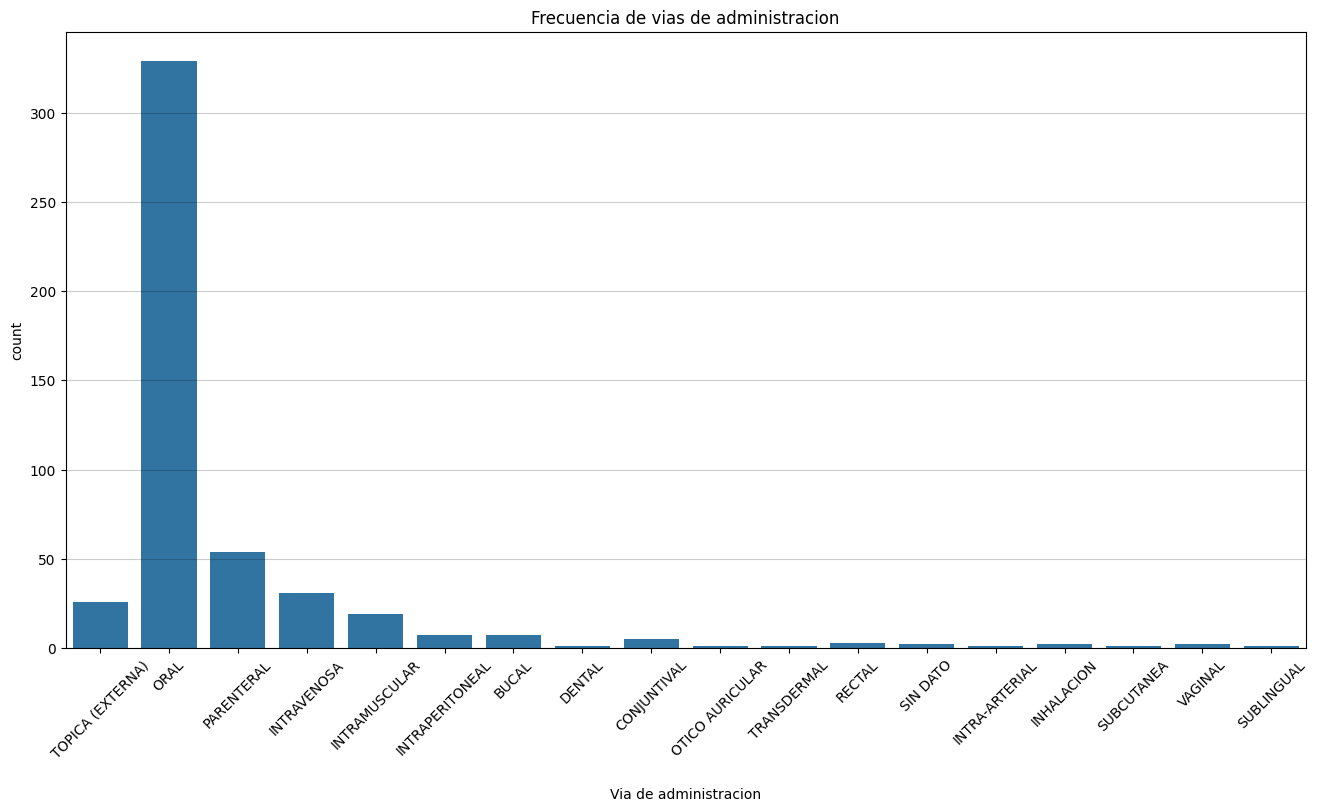

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_final, x="viaadministracion");
plt.xticks(rotation=45);
plt.xlabel("Via de administracion", labelpad=20)
plt.grid(alpha=0.2, axis="y", color="black")
plt.title("Frecuencia de vias de administracion");

En esta visualizacion observamos que la via de administracion mas comun del data set es la oral, con mucha diferencia de las demas tenien mas de 300 conteos.

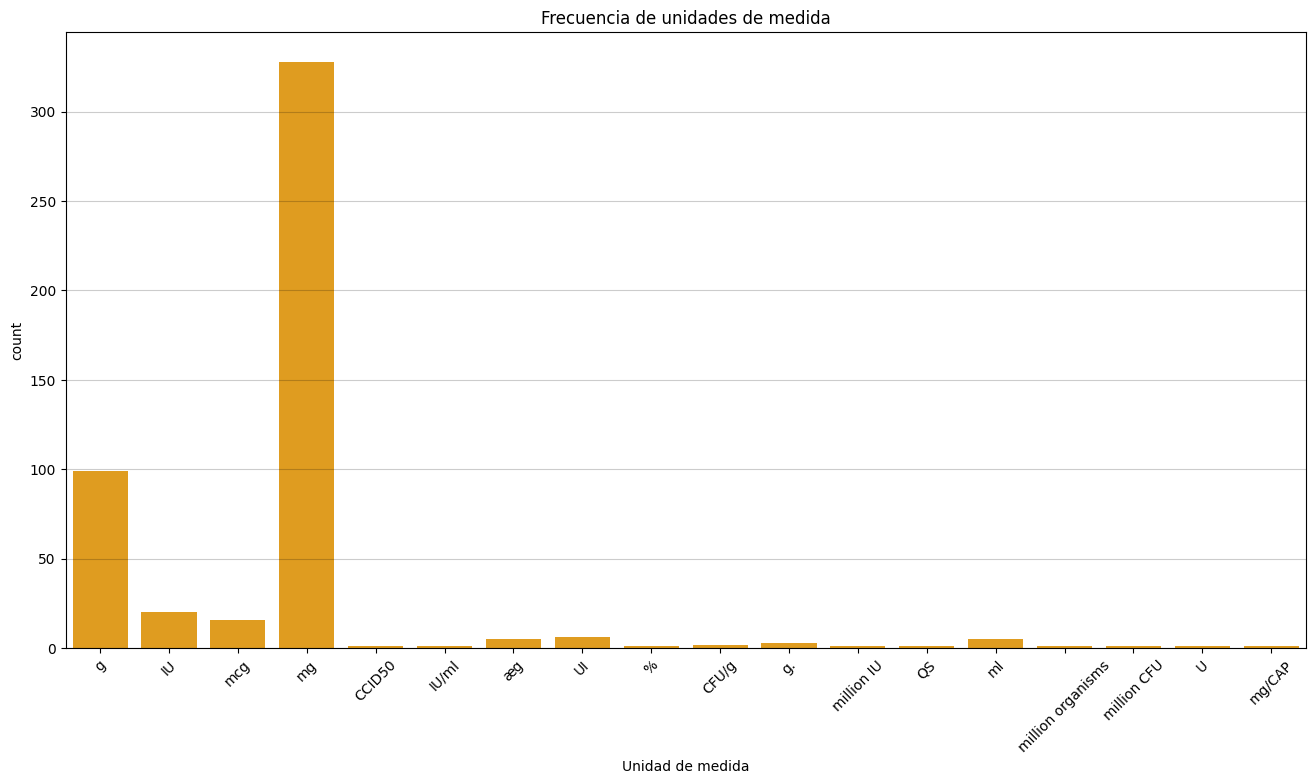

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_final, x="unidadmedida", color="orange");
plt.xticks(rotation=45);
plt.xlabel("Unidad de medida")
plt.grid(alpha=0.2, axis="y", color="black")
plt.title("Frecuencia de unidades de medida");

En esta visualizacion notamos que la cantidad de presentacion de los medicamentos es en su gran mayoria mg con mas de 300 conteos, seguida por los gramos, las demas presentaciones son poco frecuentes, tambien la podemos representar con un grafico de pastel aunque al tener tantas variables y muchas de poco porcentaje, el grafico seria dificil de visualizar

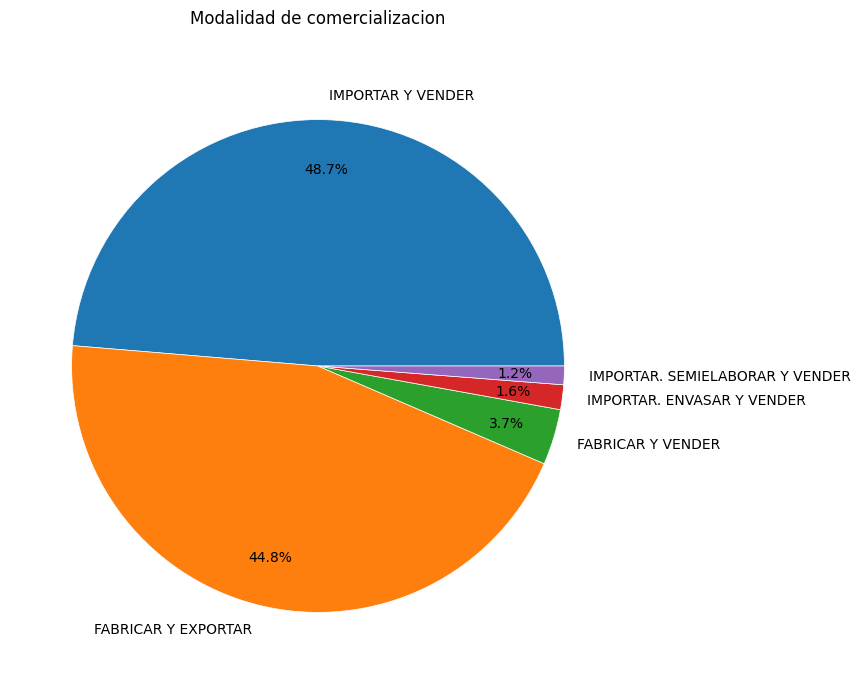

In [35]:
plt.figure(figsize=(12,8))
plt.pie(df_final.modalidad.value_counts().values, labels=df_final.modalidad.unique(),  autopct="%1.1f%%", wedgeprops={'edgecolor': 'w', 'linewidth': 0.5}, pctdistance=0.8);
plt.title("Modalidad de comercializacion", pad=25);

En este grafico podemos observar que las modalidades principal de distribucion de los medicamentos son importar y vender y fabricar y vender, las demas modalidades presentan muy poco porcentaje en el dataset

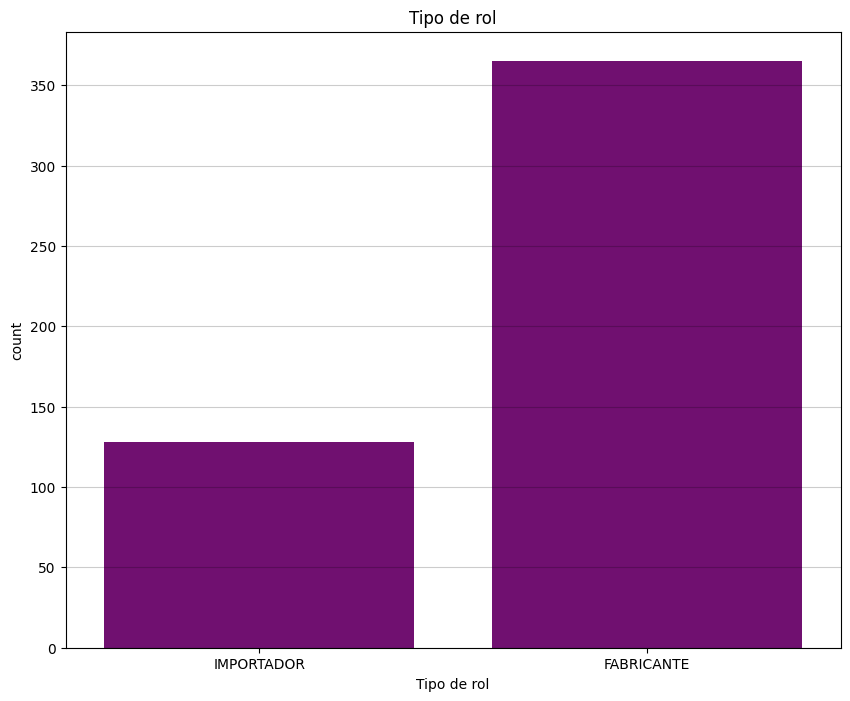

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_final, x="tiporol", color="purple");
plt.xlabel("Tipo de rol")
plt.grid(alpha=0.2, axis="y", color="black")
plt.title("Tipo de rol");

En esta visualizacion notamos que principalmente los medicamentos provienen de fabricantes, aproximadamente el doble que los medicamentos importados.

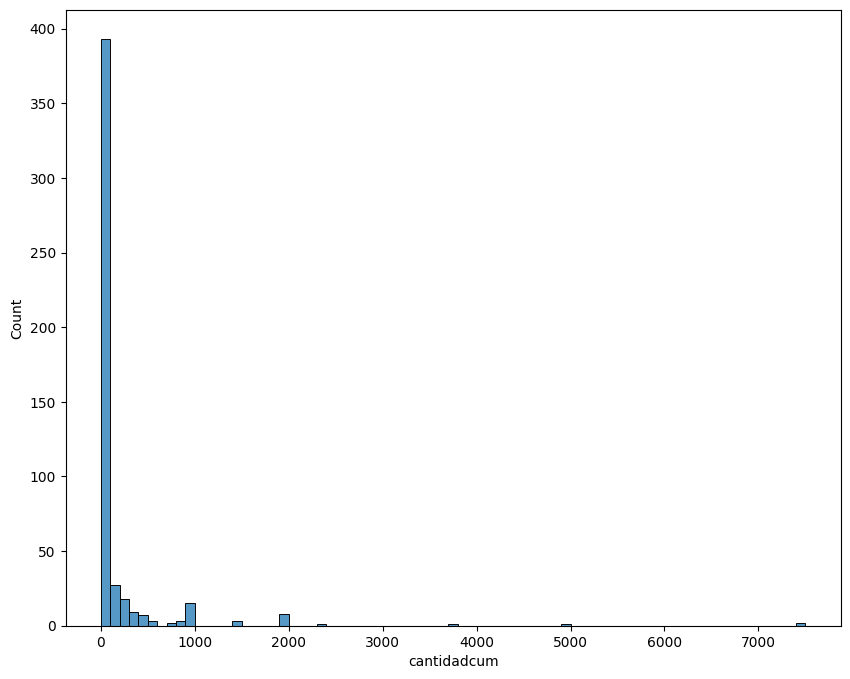

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_final, x="cantidadcum", binwidth=100);

Con este histograma de frecuencia de la cantidad de la presentacion del medicamento notamos que normalmente los medicamentos vienen en su gran mayoria en presentaciones de 0 a 100, sin embargo, no sabemos en este grafico las unidades de cada cantidad, dato que es muy importante para el analisis. Ademas podemos notar datos muy dispersos, datos atipicos, para analizar esto podemos realizar un boxplot.

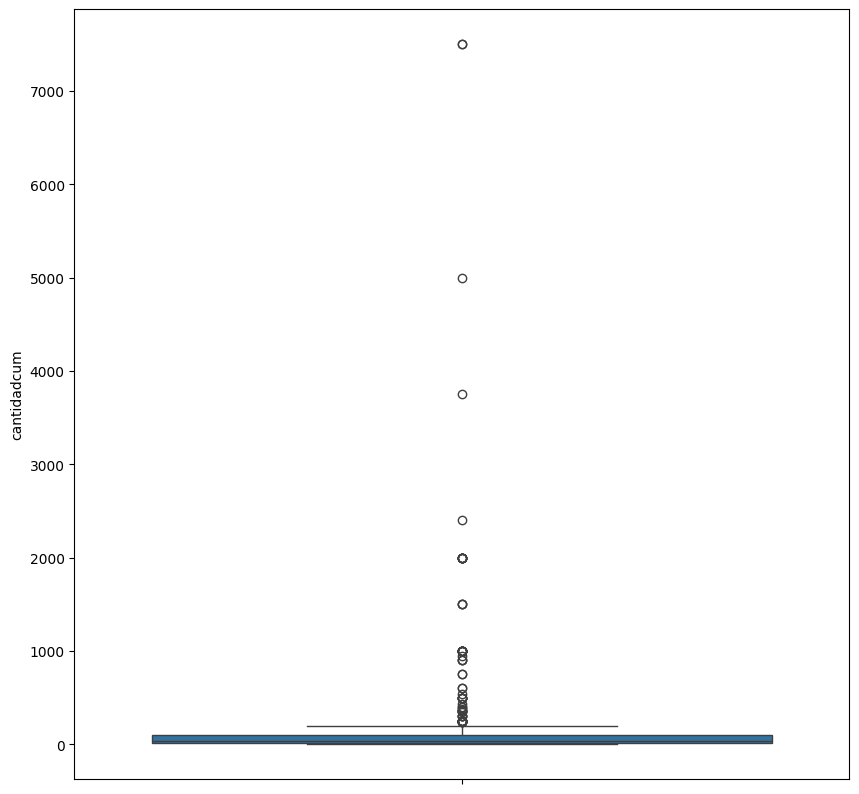

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_final, y="cantidadcum");

Gracias al boxplot notamos la gran presencia de datos atipicos, algunos muy alejados del promedio, una de las prosibles causas sea la diferencia de unidades de medicion

## Analisis bivariado

Ahora podemos realizar graficos relacionando dos variables

Dos variables interesantes de ralacionar es la fecha de expedicion y fecha de vencimiento, sin embargo estos datos originalmente en el dataset se encuentran en formanto object, entonces antes de analizarlos los convertimos a formato datatime

In [41]:
df_copy = df_final.copy()

df_copy["fechaexpedicion"] = pd.to_datetime(df["fechaexpedicion"], format='%d/%m/%Y')
df_copy["fechavencimiento"] = pd.to_datetime(df["fechavencimiento"], format='%d/%m/%Y')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   expediente            493 non-null    int64         
 1   producto              493 non-null    object        
 2   titular               493 non-null    object        
 3   registrosanitario     493 non-null    object        
 4   fechaexpedicion       493 non-null    datetime64[ns]
 5   fechavencimiento      493 non-null    datetime64[ns]
 6   estadoregistro        493 non-null    object        
 7   expedientecum         493 non-null    int64         
 8   consecutivocum        493 non-null    int64         
 9   cantidadcum           493 non-null    float64       
 10  descripcioncomercial  493 non-null    object        
 11  estadocum             493 non-null    object        
 12  fechaactivo           493 non-null    object        
 13  fechainactivo         493

In [42]:
df_copy.describe()

,expediente,fechaexpedicion,fechavencimiento,expedientecum,consecutivocum,cantidadcum,cantidad
count,4.930000e+02,493,493,4.930000e+02,493.000000,493.000000,4.930000e+02
mean,1.322901e+07,2003-12-11 17:57:48.559837696,2014-05-01 01:50:59.634888448,1.322901e+07,4.718053,193.926389,7.481332e+08
min,8.424000e+03,1992-02-22 00:00:00,2003-12-04 00:00:00,8.424000e+03,1.000000,1.000000,1.017000e-02
25%,2.185920e+05,1999-01-01 00:00:00,2009-09-12 00:00:00,2.185920e+05,1.000000,10.000000,4.000000e+05
50%,1.992889e+07,2002-08-04 00:00:00,2015-06-12 00:00:00,1.992889e+07,3.000000,30.000000,2.500000e+06
75%,1.998827e+07,2008-12-16 00:00:00,2017-12-24 00:00:00,1.998827e+07,5.000000,100.000000,1.500000e+07
max,2.011820e+07,2018-12-04 00:00:00,2023-10-05 00:00:00,2.011820e+07,135.000000,7500.000000,2.400000e+11
std,9.395403e+06,NaN,NaN,9.395403e+06,8.701207,641.663929,1.171254e+10


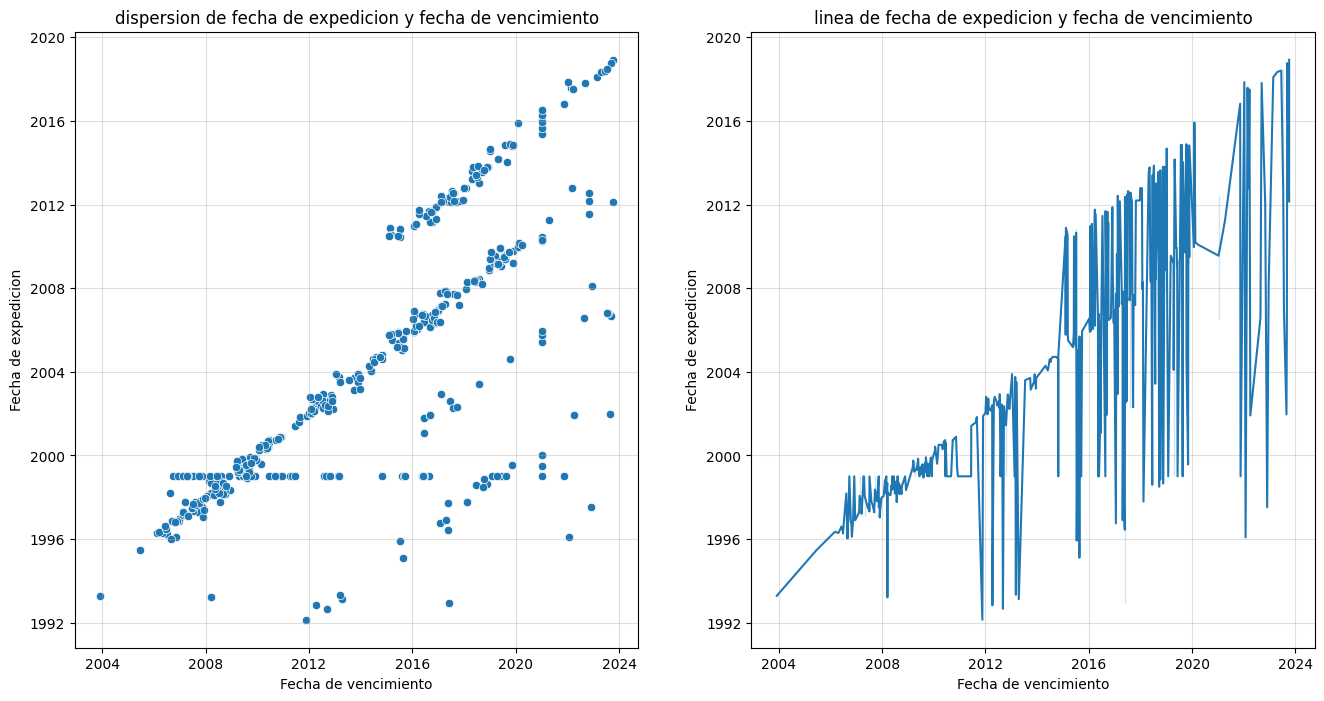

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data=df_copy, x="fechavencimiento", y="fechaexpedicion");
plt.xlabel("Fecha de vencimiento")
plt.ylabel("Fecha de expedicion")
plt.grid(alpha=0.4)
plt.title("dispersion de fecha de expedicion y fecha de vencimiento");
plt.subplot(1,2,2)
sns.lineplot(data=df_copy, x="fechavencimiento", y="fechaexpedicion");
plt.xlabel("Fecha de vencimiento")
plt.ylabel("Fecha de expedicion")
plt.grid(alpha=0.4)
plt.title("linea de fecha de expedicion y fecha de vencimiento");

Con esta visualizacion notamos que la fecha de vencimiento varia mucho segun cada medicamento, algunos duran mas que otros hasta su vendimiento, seria necesario relacionarlo con otras variables para extraer mas informacion

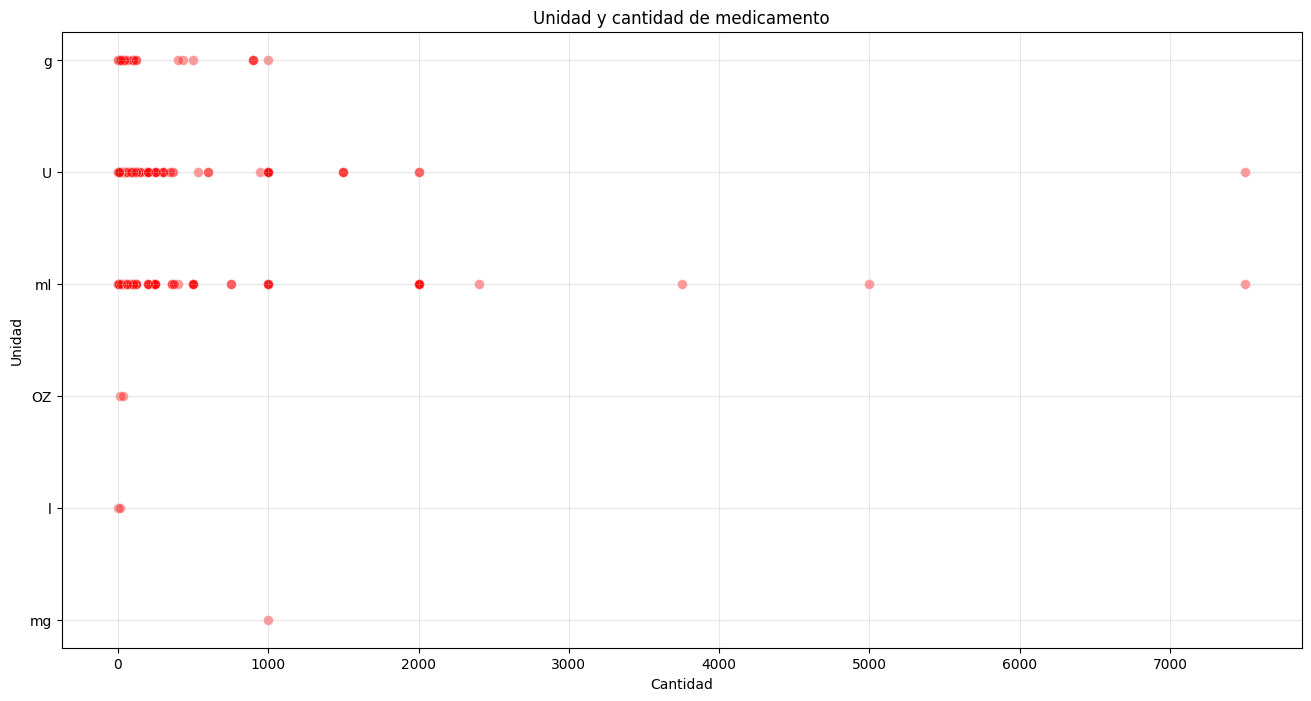

In [48]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_copy, y="unidad", x="cantidadcum", s=50,alpha=0.4, color="r");
plt.xlabel("Cantidad")
plt.ylabel("Unidad")
plt.grid(alpha=0.3)
plt.title("Unidad y cantidad de medicamento");

En esta visualizacion tenemos las cantidades que presenta cada unidad de medida, ademas notamos de que unidad de medicion proceden los datos atipicos notados anteriormente en el boxplot.

## Analisis multivariado

Para inicial el analisis multivariado creamos y visualizamos la matriz de correlacion

In [49]:
df_copy.corr(numeric_only=True)

,expediente,expedientecum,consecutivocum,cantidadcum,cantidad
expediente,1.000000,1.000000,0.162615,-0.054283,0.040467
expedientecum,1.000000,1.000000,0.162615,-0.054283,0.040467
consecutivocum,0.162615,0.162615,1.000000,-0.032224,-0.025466
cantidadcum,-0.054283,-0.054283,-0.032224,1.000000,-0.016200
cantidad,0.040467,0.040467,-0.025466,-0.016200,1.000000


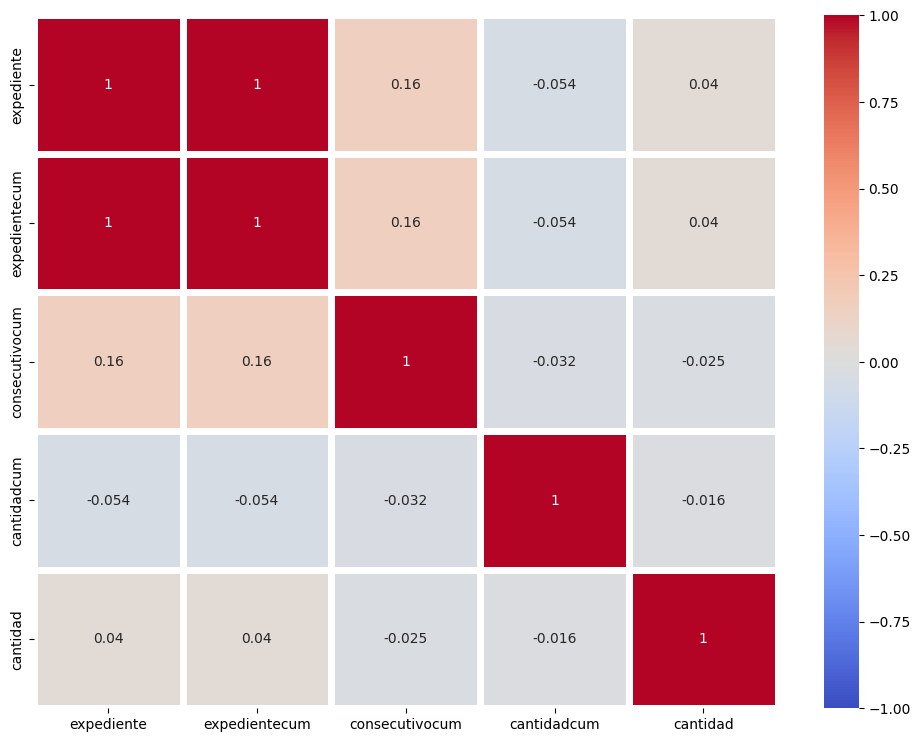

In [50]:
plt.figure(figsize=(12,9))
sns.heatmap(df_copy.corr(numeric_only=True), annot= True, linewidths=5, cmap='coolwarm', vmin=-1,vmax=1);

Notamos que no existe correlacion entre las variables, con la excepcion de expediente y expedientecum, sin embargo, estas dos variables en el dataset son exactamente iguales